# Artificial Neural Networks in TensorFlow

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [3]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step 


In [12]:
x_train.shape

(60000, 28, 28)

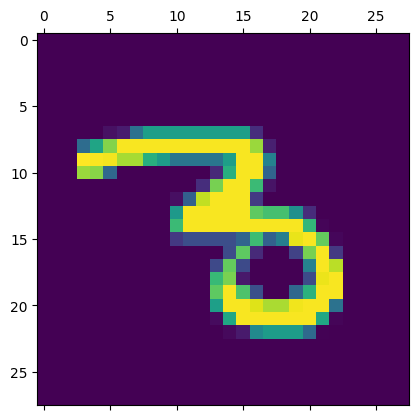

Value inside the image is 3


In [25]:
sample = 30
plt.matshow(x_train[sample]);
plt.show();
print(f"Value inside the image is {y_train[sample]}");

In [36]:
X_train = x_train.reshape(len(x_train), 28*28)/255

In [37]:
x_test.shape

(10000, 28, 28)

In [38]:
X_test = x_test.reshape(len(x_test), 28*28)/255

## Vanilla Model with no Layers

In [69]:
model = keras.Sequential([
    # reshape the input already or, flatter inside the sequential method
    # keras.layers.Flatten(input_shape=(28, 28))
    keras.layers.Dense(10, input_shape=(784, ), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Example usage (replace X_train and y_train with actual data):


C:\Users\dbala\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8044 - loss: 0.7269
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9165 - loss: 0.2979
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9196 - loss: 0.2886
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9243 - loss: 0.2695
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9256 - loss: 0.2673


In [71]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9158 - loss: 0.3020    


[0.2665415406227112, 0.9271000027656555]

In [72]:
pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


```python
np.argmax(i) # where i is a list, returns the index of the maximum value in the list
```

In [73]:
pred_vals = [np.argmax(i) for i in pred]
conf_mat = tf.math.confusion_matrix(labels = y_test, predictions=pred_vals)

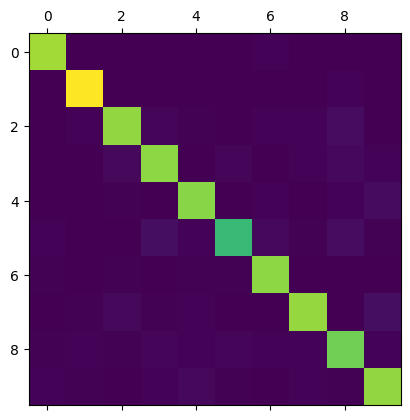

tf.Tensor(
[[ 958    0    2    2    0    4    9    2    2    1]
 [   0 1114    3    2    0    1    4    2    9    0]
 [   3    9  932   15    8    3   12    9   37    4]
 [   2    0   22  926    0   17    2    9   23    9]
 [   1    1    5    1  916    0   11    4   10   33]
 [  11    3    3   41   10  752   22    7   35    8]
 [   7    3    7    1    7    6  923    2    2    0]
 [   1    8   25    5    9    0    0  938    1   41]
 [   6    9    8   15    9   18   10   10  878   11]
 [  10    7    2   10   23    5    0   12    6  934]], shape=(10, 10), dtype=int32)


In [74]:
plt.matshow(conf_mat)
plt.show()
print(conf_mat)

## Model with layers

In [75]:
model0 = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),  # Hidden layer with 128 neurons
    keras.layers.Dense(64, activation='relu'),                      # Another hidden layer with 64 neurons
    keras.layers.Dense(10, activation='softmax')                    # Output layer with 10 neurons for classification
])
model0.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
             )
model0.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
model0.fit(X_train, y_train, epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8811 - loss: 0.4091
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9671 - loss: 0.1082
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9772 - loss: 0.0727
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9839 - loss: 0.0516
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9885 - loss: 0.0365
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9893 - loss: 0.0318
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9913 - loss: 0.0266
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9928 - loss: 0.0225
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9939 - loss: 0.0188
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9939 - loss: 0.0179
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9944 - loss: 0.0168
Epoch 12/15
1875/1875 ━━

# Convolutional Neural Networks in TensorFlow

Dataset = https://www.cs.toronto.edu/%7Ekriz/cifar.html

In [78]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 105s 1us/step


In [79]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [85]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

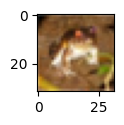

The image shown here is frog


In [91]:
plt.figure(figsize=(1, 1))
plt.imshow(x_train[0])
plt.show()
print("The image shown here is " + color.BOLD + f"{labels[y_train[0][0]]}" + color.END)

In [93]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [126]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [100]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [101]:
x_train = x_train/255
x_test = x_test/255

## Vanilla ANN Model

In [103]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape = (32, 32, 3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model1.compile(optimizer = 'SGD',
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy']
              )
model1.summary()

C:\Users\dbala\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 3000)                │       9,219,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1000)                │       3,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,230,010 (46.65 MB)

 Trainable params: 12,230,010 (46.65 MB)

 Non-trainable params: 0 (0.00 B)

In [104]:
model1.fit(x_test, y_test, epochs=5)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.2292 - loss: 2.1073
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 70ms/step - accuracy: 0.3513 - loss: 1.8270
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0.3783 - loss: 1.7378 
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 79ms/step - accuracy: 0.4151 - loss: 1.6661
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 77ms/step - accuracy: 0.4298 - loss: 1.6199
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.4469 - loss: 1.5856
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - accuracy: 0.4607 - loss: 1.5353
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.4780 - loss: 1.5158
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.4875 - loss: 1.4652
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 56ms/step - accuracy: 0.5028 - loss: 1.4432


In [108]:
from sklearn.metrics import confusion_matrix, classification_report

In [110]:
y_pred = model1.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


In [111]:
y_pred = [np.argmax(i) for i in y_pred]

In [123]:
print( color.BOLD + 23*" " +  "Classification Report \n" + 30*"--"+ color.END + '\n', classification_report(y_test, y_pred))

                       Classification Report 
------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.44      0.69      0.54      1000
           1       0.70      0.56      0.62      1000
           2       0.47      0.24      0.32      1000
           3       0.43      0.33      0.37      1000
           4       0.33      0.68      0.45      1000
           5       0.37      0.66      0.47      1000
           6       0.59      0.49      0.54      1000
           7       0.70      0.46      0.55      1000
           8       0.84      0.31      0.45      1000
           9       0.71      0.48      0.57      1000

    accuracy                           0.49     10000
   macro avg       0.56      0.49      0.49     10000
weighted avg       0.56      0.49      0.49     10000



## CNN Model

In [124]:
cnn = keras.Sequential([
    # Conv Layer
    keras.layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', input_shape = (32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', input_shape = (32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    # Dense Network
    keras.layers.Flatten(input_shape = (32, 32, 3)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer = 'adam',
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy']
              )
cnn.summary();

C:\Users\dbala\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\dbala\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 100)                 │         115,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 142,670 (557.30 KB)

 Trainable params: 142,670 (557.30 KB)

 Non-trainable params: 0 (0.00 B)

In [125]:
cnn.fit(x_test, y_test, epochs = 10)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.2128 - loss: 2.0885
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.4256 - loss: 1.5628
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.5032 - loss: 1.3971
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.5484 - loss: 1.2540
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.5869 - loss: 1.1562 
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.6204 - loss: 1.0867 
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.6432 - loss: 1.0018
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.6606 - loss: 0.9389
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.6998 - loss: 0.8478
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.7150 - loss: 0.8052


In [128]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7572 - loss: 0.7014


[0.6994301080703735, 0.7566999793052673]

In [150]:
def plot_sample(x, y, index):
    plt.figure(figsize=(2, 2))
    plt.title(labels[y[index]])
    plt.imshow(x[index])
    plt.show()


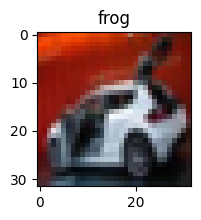

             automobile


In [157]:
plot_sample(x_test, y_test, 6)

In [161]:
def plot_pred_sample(x, y, y_p, index):
    plt.figure(figsize=(2, 2))
    plt.title(labels[y[index]])
    plt.imshow(x[index])
    plt.show()
    print(color.BOLD + color.PURPLE + 13*" " +  labels[y_p[index]] + color.END)

In [158]:
y_pred = cnn.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [160]:
y_pred = [np.argmax(i) for i in y_pred]

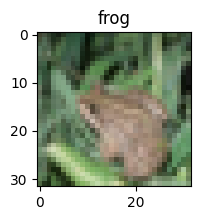

             frog


In [167]:
plot_pred_sample(x_test, y_test, y_pred, 4)

In [169]:
print( color.BOLD + 23*" " +  "Classification Report \n" + 30*"--"+ color.END + '\n', classification_report(y_test, y_pred))

                       Classification Report 
------------------------------------------------------------
               precision    recall  f1-score   support

           0       0.92      0.68      0.78      1000
           1       0.87      0.78      0.82      1000
           2       0.66      0.69      0.68      1000
           3       0.59      0.69      0.64      1000
           4       0.73      0.70      0.72      1000
           5       0.65      0.77      0.71      1000
           6       0.80      0.83      0.81      1000
           7       0.92      0.73      0.81      1000
           8       0.88      0.81      0.84      1000
           9       0.70      0.89      0.79      1000

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.76      0.76     10000



## Model for MNIST Dataset using CNN

In [ ]:
# TODO